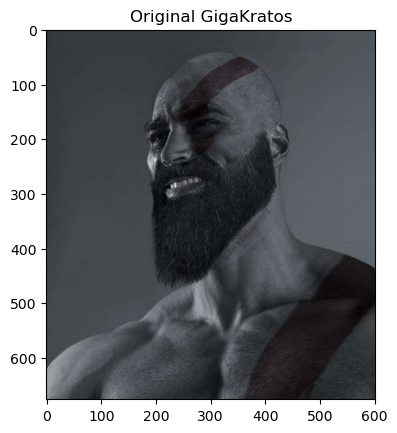

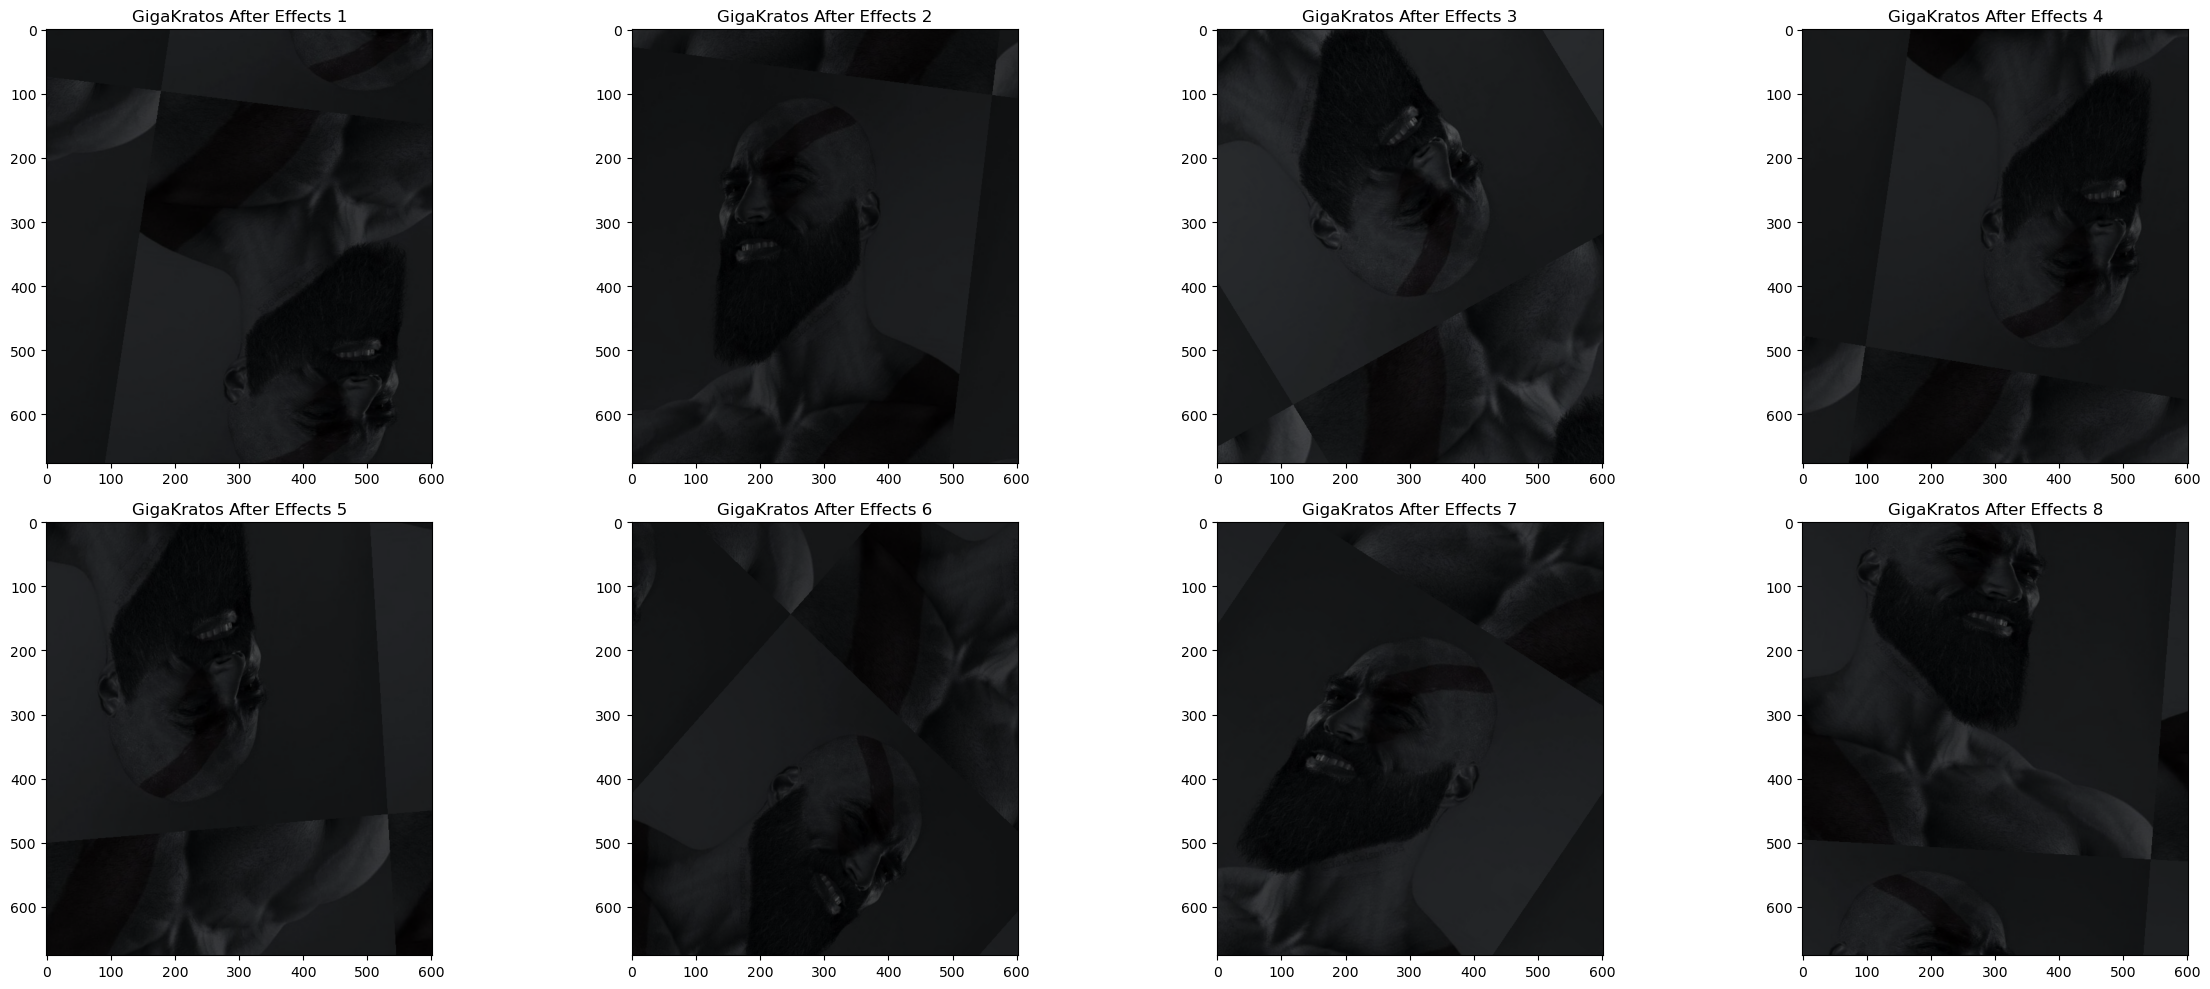

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

img_path = 'GigaKratos.jpg'
Image = load_img(img_path)
plt.imshow(Image)

plt.title('Original GigaKratos')
plt.show()

img_array = img_to_array(Image)
img_array = np.expand_dims(img_array, axis=0)

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.4,
        height_shift_range=0.2,
        shear_range=0.5,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(1,0.6),
        rescale=0.5,
        fill_mode='wrap')

Augmented_Images = []
for i in range(8):
    aug_img_array = datagen.flow(img_array, batch_size=1)[0]
    Augmented_Img = aug_img_array.astype('uint8')
    Augmented_Images.append(Augmented_Img)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))
axes = axes.ravel()
for i in range(8):
    axes[i].imshow(Augmented_Images[i][0])
    axes[i].set_title('GigaKratos After Effects ' + str(i+1))
    axes[i].axis('on')
plt.tight_layout()
plt.show()

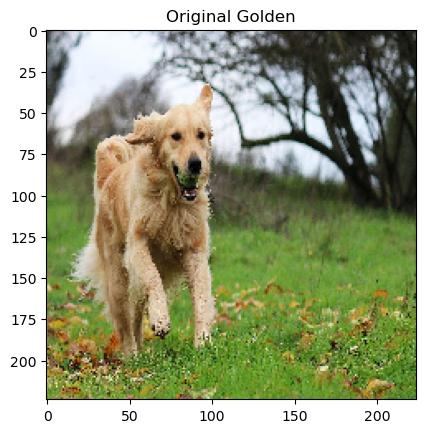

1/1 [==============================] - 1s 526ms/step

Predictions for Augmented Image 1:
coyote: 19.14%
timber_wolf: 16.06%
white_wolf: 10.25%
llama: 4.17%
Norwich_terrier: 4.13%
golden_retriever: 3.50%
red_wolf: 3.18%
West_Highland_white_terrier: 3.04%
Lakeland_terrier: 2.88%
red_fox: 2.49%
1/1 [==============================] - 0s 59ms/step

Predictions for Augmented Image 2:
clumber: 42.80%
golden_retriever: 10.48%
English_setter: 7.68%
cocker_spaniel: 4.50%
Welsh_springer_spaniel: 3.96%
Lakeland_terrier: 3.53%
kuvasz: 3.00%
coral_fungus: 2.39%
Airedale: 1.73%
Norwich_terrier: 1.26%
1/1 [==============================] - 0s 58ms/step

Predictions for Augmented Image 3:
American_chameleon: 5.95%
ibex: 3.76%
coyote: 3.07%
timber_wolf: 2.89%
malamute: 2.77%
leopard: 2.50%
chainlink_fence: 2.31%
coral_fungus: 2.01%
brambling: 1.99%
Siberian_husky: 1.97%
1/1 [==============================] - 0s 61ms/step

Predictions for Augmented Image 4:
borzoi: 37.72%
golden_retriever: 19.15%
Irish_t

In [53]:
#PART II: Using the pre-trained model

img_path = 'Golden.jpeg'
Image = load_img(img_path, target_size=(224, 224))
plt.imshow(Image)

plt.title('Original Golden')
plt.show()

img_array = img_to_array(Image)
img_array = np.expand_dims(img_array, axis=0)

orig_img_array = img_to_array(Image)
orig_img_array = np.expand_dims(orig_img_array, axis=0)
orig_img_array = preprocess_input(orig_img_array)

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.4,
        height_shift_range=0.2,
        shear_range=0.5,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(1,0.6),
        rescale=0.5,
        fill_mode='wrap')

Augmented_Images = []
for i in range(8):
    aug_img_array = datagen.flow(img_array, batch_size=1)[0]
    aug_img_array = np.squeeze(aug_img_array, axis=0)
    Augmented_Img = aug_img_array.astype('uint8')
    Augmented_Images.append(Augmented_Img)

model = ResNet50(weights='imagenet')

for i in range(8):
    aug_img = Augmented_Images[i]
    aug_img = np.expand_dims(aug_img, axis=0)
    aug_img = preprocess_input(aug_img)
    preds = model.predict(aug_img)
    decoded_preds = decode_predictions(preds, top=10)[0]
    print(f"\nPredictions for Augmented Image {i+1}:")
    if decoded_preds:
        for pred in decoded_preds:
            print(f"{pred[1]}: {pred[2]*100:.2f}%")
    else:
        print("No predictions found.")  

